<a href="https://colab.research.google.com/github/prof-Thiago-Nunes/Projetos-data-science-/blob/main/Detec%C3%A7%C3%A3o_de_Fraude_em_Cart%C3%B5es_de_Cr%C3%A9dito.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---


*by [Prof Thiago Nunes](https://www.linkedin.com/in/prof-thiago-nunes/)*  

---

# Detecção de Fraudes em Cartões de Crédito

**Introdução**

Apesar do surgimento constante de novos meios de pagamento, o cartão de crédito ainda concentra grande parte das transações do varejo brasileiro, justamente pela enorme quantidade de transações que isso significa — mais de R$ 1 trilhão somente em 2019, segundo a Abecs (Associação Brasileira das Empresas de Cartões de Crédito.

Esse cenário faz com que grandes quadrilhas de fraudadores vivam em busca de meios para conseguir os dados desses cartões com o intuito de realizar aquilo que é um dos maiores pesadelos do varejo hoje em dia: a Fraude de Cartão de Crédito.

**Como acontecem as fraudes?**

Como dito, o cartão de crédito é uma das formas de pagamento preferidas entre os brasileiros — e, consequentemente, um dos atalhos mais desejados para a realização de fraudes e golpes.

Na maioria das vezes, as fraudes são um resultado de descuidos ou incidentes por parte dos usuários, porém as ferramentas de segurança e de antifraude da instituição financeira também podem contribuir para que compras indevidas não sejam aprovadas, por exemplo.

**Quais são os principais riscos?**

No caso dos consumidores, quando acontece alguma fraude, o cartão de crédito pode servir para realizar compras pelos criminosos, ocasionando prejuízos financeiros imediatos, assim como cobranças indevidas.

Também existe a questão do vazamento de dados pessoais, como nome completo, número do documento de identificação, endereço residencial, entre outras informações. Certamente, isso pode aumentar a possibilidade de outros tipos de golpes futuros.

Como consequência, as vítimas dessa situação podem ter seu nome nos birôs de proteção ao crédito, ficando com nome negativado. 

Para os varejistas, além das perdas financeiras, as fraudes afetam a reputação do negócio. Na maioria das vezes, quando há fraudes de cartão de crédito, o score da empresa atrapalha a autorização da venda, assim a nota cai e as instituições financeiras negam o pedido.

Além disso, a fraude faz com que as empresas percam créditos perante os consumidores. Os clientes ficam com receio de possível vazamento de dados ou utilização de forma indevida, deixando de realizar suas compras no estabelecimento.

Neste projeto, iremos abordar o problema das fraudes em cartões de crédito, uma das principais preocupações das instituições financeiras como bancos e *fintechs*. Apenas no Brasil, cerca de 12,1 milhões de pessoas já foram vítimas de algum tipo de fraude financeira no último ano. Traduzindo em valores, os golpes financeiros ultrapassaram a cifra de R$ 1,8 bilhão de prejuízo por ano para os últimos 12 meses.

<p align=center>
<img src="https://img.freepik.com/free-vector/password-phising-display-laptop-screen-white-isolated-background_197170-1050.jpg?w=740" width="60%"></p>

Dentra essas fraudes, aquelas envolvendo cartões de crédito são de grande relevância uma vez que a sua não-detecção acaretará em prejuízos consideráveis, tanto para o consumidor quanto para a instituição financeira.

Um outro fator a ser considerado é a quantidade de falsos positivos, ou seja, aquelas vezes em que você tentou fazer uma compra e teve seu cartão bloqueado preventivamente - o que provavelmente gerou estresse e constrangimento.

Por todos esses motivos, o investimento na área de detecção de fraudes por meio de Inteligência Artificial vem crescendo a cada ano, representando uma grande oportunidade em *Data Science*. 

Dispondo de grandes volumes de dados como base histórica, um algoritmo de machine learning apenas um pouco melhor que os anteriores já representa uma economia de milhões de Reais. E esse é o desafio, aprimorar cada vez mais o uso de algoritmos visando inibir ou evitar transações fraudulentas.

## Importando os Dados
Os dados que usaremos neste projeto foram disponibilizados por algumas empresas européias de cartão de crédito. O *dataset* representa as operações financeiras que aconteceram no período de dois dias, onde foram classificadas **492 fraudes** em meio a quase **284.807,00 mil transações**.

Outro detalhe interessante é que as *features* são todas numéricas, e foram descaracterizadas (por problemas ligados à privacidade e segurança). Assim, os nomes das colunas são representados por $[V1, V2, V3 \dots, V28]$.

<p align=center>
<img src="https://img.freepik.com/vetores-gratis/pagamento-com-cartao-de-credito-do-conceito-para-a-pagina-de-destino_52683-24923.jpg?size=338&ext=jpg&ga=GA1.2.601099755.1641643709" width="40%"></p>

[Na página original dos dados](https://www.kaggle.com/mlg-ulb/creditcardfraud), também é informado que as variáveis passaram por uma transformação conhecida como Análise de Componentes Principais (*Principal Component Analysis* - PCA).

A PCA permite a redução da dimensionalidade enquanto mantém o maior número possível de informações. Para conseguir isso, o algoritmo encontra um conjunto novo de recursos e torna os nomes das colunas anônimos - os chamados **componentes**.

### Instalando bibliotecas necessárias

In [ ]:
# instalar a biblioteca scikit-plot
!pip install scikit-plot -q

### Importando as bibliotecas necessárias

In [ ]:
# importar os pacotes necessários

# Tratamento e visualização de dados
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import scikitplot as skplt

# Eliminar os warnings (avisos)
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

# Bibliotecas padrão do Python
import math   
import warnings
from zipfile import ZipFile
import os

# essas bibliotecas vem com o Python, logo, ela acompanha a versão do Python
import sys


from imblearn.under_sampling import RandomUnderSampler

# Bibliotecas de classificação

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score


Para facilitar a aquisição dos dados, criei um *link* com acesso direto ao `csv`. Com isso, basta importar o conjunto de dados usando o método `pd.read_csv()`.

In [ ]:
# importar os dados para um dataframe
file_path = "https://www.dropbox.com/s/b44o3t3ehmnx2b7/creditcard.csv?dl=1"
df = pd.read_csv(file_path)

In [ ]:
# Mostrar todas as colunas
pd.set_option('display.max_columns', None)

Com os dados importados para dentro de uma estrutura *Dataframe* - e não havendo a necessidade de mais nenhum ajuste ou configuração nesta etapa, pode-se iniciar uma análise exploratória dos dados a fim de preparar um modelo de *Machine Learning*.

## Análise Exploratória

Abordar tópicos/informações como:

* Visualizar as 5 primeiras entradas;
* Visualizar as 5 últimas entradas;
* Visualizar o tamanho do dataset;
* Verificar o tipo dos dados do Dataset;
* Visualizar o resumo estatístico do dataframe;
* Visualizar os outliers;
* Visualizar os gráficos de densidade;
* Visualizar transações com valores zerados;
* Verificar se há valores ausentes;
* Plotar um gráfico de barras (ou countplot) para ver o balanceamento do *dataset*;
* Plotar os seguintes histogramas:
    * Variável `Time`
        * Fraude (`Class == 1`)
        * Normal (`Class == 0`)
    * Variável `Amount`
        * Fraude (`Class == 1`)
        * Normal (`Class == 0`)
* Plotar um `boxplot` para a variável `Amount` quando houve fraude (`Class == 1`)
* Plotar uma matriz de correlação

### Vizualizar as 5 primeiras entradas

In [ ]:
# Vizualizar as 5 primeiras entradas
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


### Visualizar as 5 últimas entradas

In [ ]:
# Visualizar as 5 últimas entradas
df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,-0.915427,-1.040458,-0.031513,-0.188093,-0.084316,0.041333,-0.302620,-0.660377,0.167430,-0.256117,0.382948,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


### Verificando a quantidade de entradas e variáveis do dataset

In [ ]:
# Verificando a quantidade de entradas e variáveis do dataset
print(f"Quantidade de ENTRADAS do dataset: {df.shape[0]}")
print(f"Quantidade de VARIÁVEIS do dataset: {df.shape[1]}")

Quantidade de ENTRADAS do dataset: 284807
Quantidade de VARIÁVEIS do dataset: 31


### Verificar o tipo dos dados do Dataset

In [ ]:
# Verificando o tipo dos dados do Dataset 

for i in dict(df.dtypes).items():
  variavel = i[0]
  caracteres = '_'*(10 - len(variavel))
  tipo = i[1]
  print(f'A variável [{variavel}]{caracteres} é do tipo {tipo}')


A variável [Time]______ é do tipo float64
A variável [V1]________ é do tipo float64
A variável [V2]________ é do tipo float64
A variável [V3]________ é do tipo float64
A variável [V4]________ é do tipo float64
A variável [V5]________ é do tipo float64
A variável [V6]________ é do tipo float64
A variável [V7]________ é do tipo float64
A variável [V8]________ é do tipo float64
A variável [V9]________ é do tipo float64
A variável [V10]_______ é do tipo float64
A variável [V11]_______ é do tipo float64
A variável [V12]_______ é do tipo float64
A variável [V13]_______ é do tipo float64
A variável [V14]_______ é do tipo float64
A variável [V15]_______ é do tipo float64
A variável [V16]_______ é do tipo float64
A variável [V17]_______ é do tipo float64
A variável [V18]_______ é do tipo float64
A variável [V19]_______ é do tipo float64
A variável [V20]_______ é do tipo float64
A variável [V21]_______ é do tipo float64
A variável [V22]_______ é do tipo float64
A variável [V23]_______ é do tipo 

Podemos visualizar que todas as variáveis são do tipo númerico. `float`, que são números com casas decimais e `int`que são números inteiros. Apenas a variável Class possui números inteiros.

###**Resumo estatístico das variáveis**

Devido a técnica PCA e como a maioria das variáveis estão anonimizadas, vamos verificar o resumo estatístico, por meio do método `describe()`, apenas das colunas `Time`e `Amount`.

In [ ]:
# Verificar o resumo estatístico dos dados
df[["Time", "Amount"]].describe()


,Time,Amount
count,284807.000000,284807.000000
mean,94813.859575,88.349619
std,47488.145955,250.120109
min,0.000000,0.000000
25%,54201.500000,5.600000
50%,84692.000000,22.000000
75%,139320.500000,77.165000
max,172792.000000,25691.160000


Verificando acima o resumo estatístico, podemos verificar que a coluna `Time` não têm nenhuma discrepância aparente. 

Em relação à variável `Amount`, notamos que o **valor médio** das transações (considerando ambas as classes) é **88.35**, a **mediana é igual a 22.00** e o **desvio padrão de 250.12**. Atingindo o **valor máximo de 25.691,16**. 

Vemos também que **75% das transações possui o valor máximo de 77,16** o que indica que as fraudes ocorrem em sua maioria com um valor monetário baixo. Já era esperado que fossem feitas dessa forma para dificultar a descoberta do furto.

O valor mínimo de transação bancária consta o valor 0,00 o que pode indicar algum erro do dataset, sendo assim, vamos analisar especificamente as transações com o valor zerado.

In [ ]:
#verificando a quantidade de transações com valor zero
amount_zero = (df["Amount"] == 0).sum()
print(f"Quantidade total de transações com valor zero: {amount_zero}")

#verificando a porcentagem de transações com valor zero
amount_zerop = ((df["Amount"] == 0).sum() / df.shape[0])
print(f"Porcentagem de transações com valor zero: {amount_zerop* 100:.2f}%")

Quantidade total de transações com valor zero: 1825
Porcentagem de transações com valor zero: 0.64%


Verificamos que apenas 0,64% do conjunto de dados representam as transações com valor zerado. Como a quantidade é muito pequena e não há informações disponíveis sobre esse tipo de transação e o porquê de estar zerado, vamos manter esses dados como estão, com o valor em "0".

###**Verificar os outliers**

Seguindo a análise exploratória, vamos plotar os *boxplots* para ver se há alguma diferença no padrão transações em relação à dimensão `Amount`.


In [ ]:
# Cores padrão a ser usadas nos gráficos
# Informando uma vez só, qualquer alteração, basta ser feita aqui
cores = {
    'legitima' : '#9E9E9E',
    'fraude' : '#003F5c',
    'texto' : '#515151'
}

# Configurando a fonte
plt.rcParams['font.family'] = 'Arial'


findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


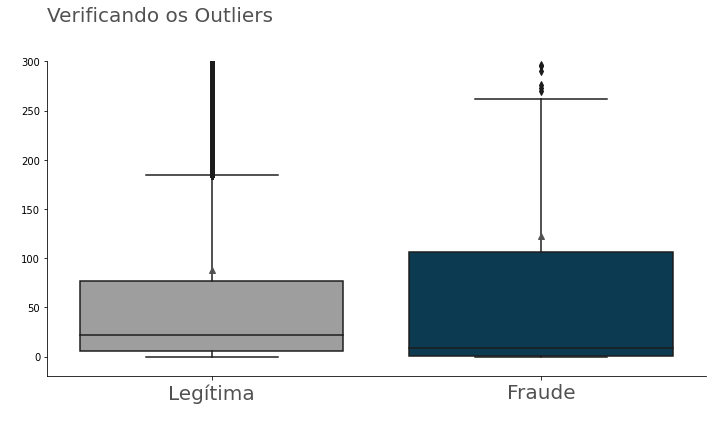

In [ ]:
fig, ax = plt.subplots(figsize=(10,6), sharex=True)

# Setando as cores padrão
sns.set_palette(cores.values())

# Criando o BOXPLOT
sns.boxplot(x = df['Class'], y = df['Amount'], showmeans=True, ax=ax)

# Remover spines da direira e superior

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.set_title('Verificando os Outliers', loc='left', pad=40, fontdict={'fontsize':20}, color= '#515151');

# Limite do BOX PLOT
plt.ylim((-20, 300))

# Colocando as legendas
plt.xticks([0, 1], ['Legítima', 'Fraude'], fontsize = 20, color='#515151')
ax.set_xlabel(' ')
ax.set_ylabel(' ')

# Mostrando (no lugar do SHOW)
plt.tight_layout();

Foi utilizado $300$ como valor máximo, pois o terceiro quartil das fraudes está aproximadamente na casa dos $275$ dólares.

Analisando o comportamento destes elementos do gráfico, podemos visualizar que a mediana dos valores fraude é inferior ao legitimo, ou seja, leva a crer que os criminosos tendem a usar valores baixos, tentando passar despercebidos.

Se analisarmos 75% dos movimentos fraudulentos são inferiores a $106$, e destes, $2/3$ abaixo de $10$, reforçando nossa hipótese.

###**Gráfico de densidade das variáveis das transações**

O gráfico de densidade é muito útil para compararmos as distribuições de cada variável para cada classe e ver quais as mais importantes para detecção de anomalias.

O que se procura nesse tipo de visualização são distribuições que diferem uma da outra, permitindo identificar fraudes mais facilmente. Veja como exemplo as variáveis V3, V4, V10 e V11, como elas são bem distintas.

A cor laranja refere-se as transações de fraude e a azul de transações autênticas.

Por outro lado, variáveis como V8, V13 e V15 são muito similares, apresentando aproximadamente o mesmo comportamento.

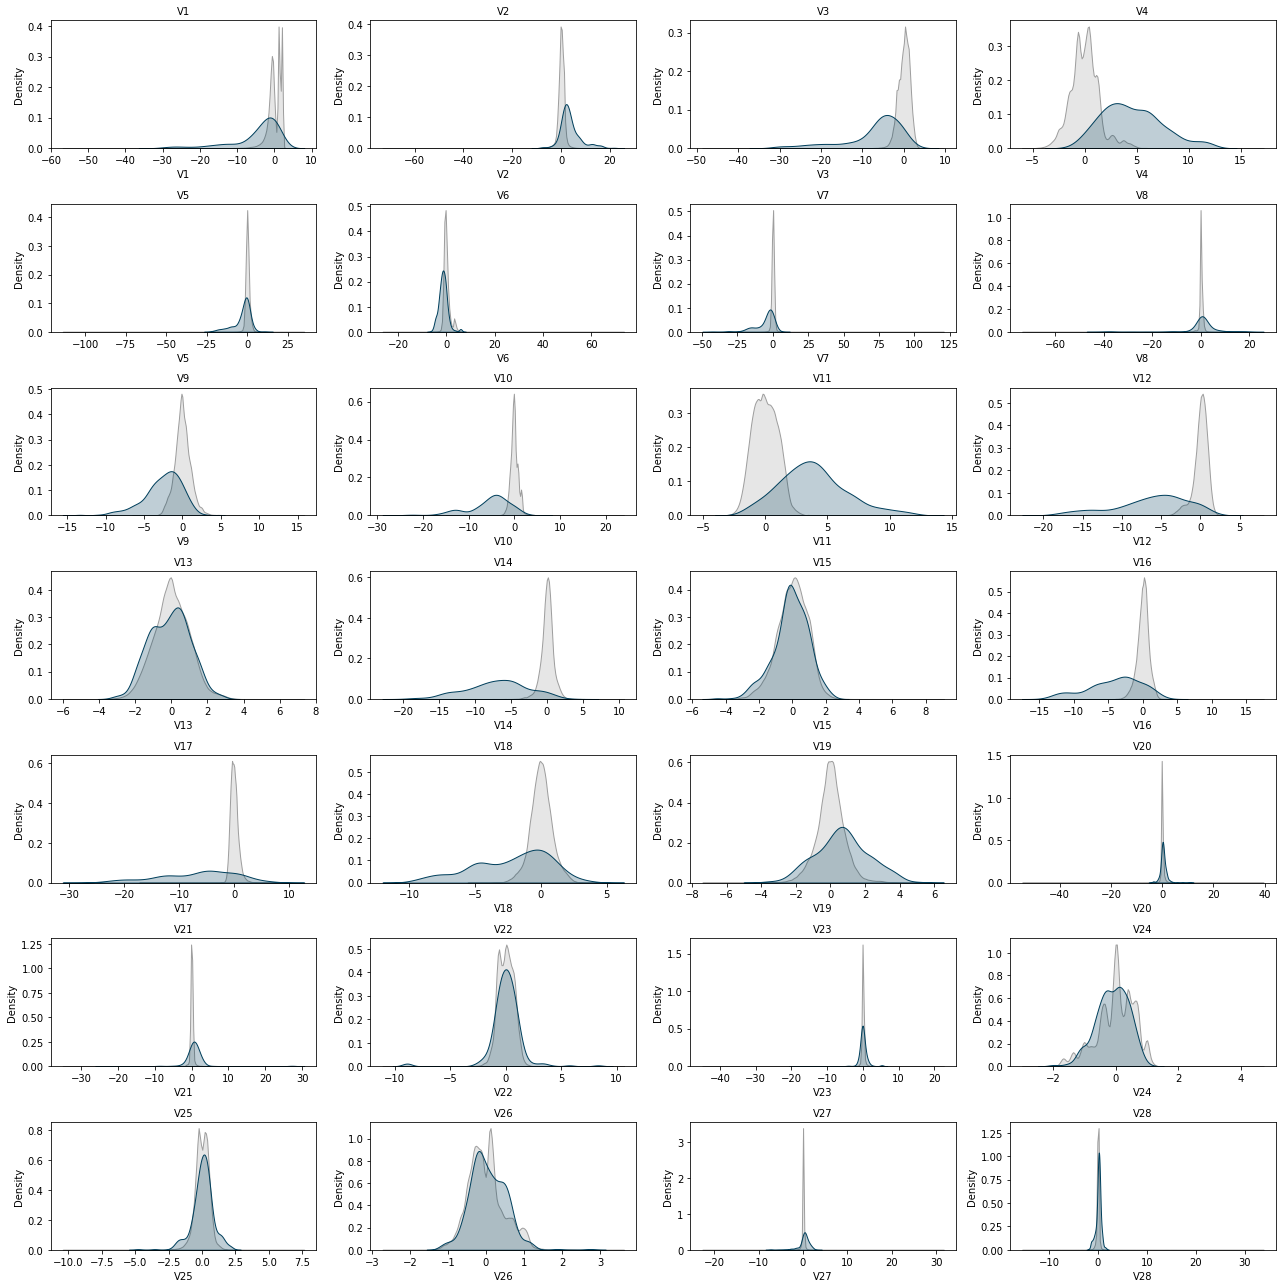

In [ ]:
# gráfico de densidades

colunas = df.drop(['Class', 'Amount', 'Time'], axis=1).columns
num_plots = len(colunas)
df_class_0 = df[df.Class == 0]
df_class_1 = df[df.Class == 1]

fig, ax = plt.subplots(nrows=7, ncols=4, figsize=(18, 18))
fig.subplots_adjust(hspace=1, wspace=1)

idx = 0
for col in colunas:
  idx += 1
  plt.subplot(7, 4, idx)
  sns.kdeplot(df_class_0[col], label="Class=0", shade=True)
  sns.kdeplot(df_class_1[col], label="Class=1", shade=True)
  plt.title(col, fontsize=10)
  
plt.tight_layout()

O que chama atenção logo à primeira vista?

V3, V4, V9-12, V17 e V18 mostram um comportamento diferente entre as variáveis;

Nas demais podemos ver um comportamento "colado".

Isso já nos dá ideia do "porquê" das decisões possivelmente tomadas pelo algoritmo.

### Verificar os valores ausentes

In [ ]:
# Verificar os valores ausentes
for i in dict((df.isnull().sum() / df.shape[0])).items():
  variavel = i[0]
  caracteres = '_'*(10 - len(variavel))
  tipo = i[1]
  print(f'A variável [{variavel}]{caracteres} possui {tipo} % de valores ausentes.')


A variável [Time]______ possui 0.0 % de valores ausentes.
A variável [V1]________ possui 0.0 % de valores ausentes.
A variável [V2]________ possui 0.0 % de valores ausentes.
A variável [V3]________ possui 0.0 % de valores ausentes.
A variável [V4]________ possui 0.0 % de valores ausentes.
A variável [V5]________ possui 0.0 % de valores ausentes.
A variável [V6]________ possui 0.0 % de valores ausentes.
A variável [V7]________ possui 0.0 % de valores ausentes.
A variável [V8]________ possui 0.0 % de valores ausentes.
A variável [V9]________ possui 0.0 % de valores ausentes.
A variável [V10]_______ possui 0.0 % de valores ausentes.
A variável [V11]_______ possui 0.0 % de valores ausentes.
A variável [V12]_______ possui 0.0 % de valores ausentes.
A variável [V13]_______ possui 0.0 % de valores ausentes.
A variável [V14]_______ possui 0.0 % de valores ausentes.
A variável [V15]_______ possui 0.0 % de valores ausentes.
A variável [V16]_______ possui 0.0 % de valores ausentes.
A variável [V1

O dataset está totalmente preenchido, ou seja, não há nenhum valor ausente ou que necessite de uma etapa de limpeza. Isso indica que antes de haver o PCA ele passou por um pré tratamento de dados.

### descrição das variáveis

In [ ]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,2.239053e-15,1.673327e-15,-1.247012e-15,8.190001e-16,1.207294e-15,4.887456e-15,1.437716e-15,-3.772171e-16,9.564149e-16,1.039917e-15,6.406204e-16,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


A distribuição dos dados mostra que Amount os três primeiros quartis estão inferiores a $ 78, ou seja, a maioria dos dados do dataset são valores pequenos, similares aos que nós gastamos em nosso dia a dia "em cada passada de cartão".

O valor máximo de uma transação foi ~$ 26 mil, mas, o que chama atenção são "passadas de cartão" com valor zero.

Infelizmente não temos mais detalhes a respeito dessas movimentações com valores zerados.

In [ ]:
# Quantidade de movimentações com valor zerado

df.query('Amount == 0')['Class'].value_counts()

0    1798
1      27
Name: Class, dtype: int64

ais uma vez, o que chamou atenção foram fraudes entre movimentações com valor ZERO.

Não vamos expurgar esses dados, pois entendemos que as demais variáveis podem ser significativas para o cálculo estatistico da classificação.

### Transações Legítimas x Transações Fraudulentas

Antes de separarmos dados para treinar o modelo, precisamos verificar se quantidade de fraudes frente a quantidade de operações legitimas tem uma proporção capaz de entregar uma amostra minima (de fraudes), evitando assim um treinamento zero fraude.

#### Verificando o balanceamento dos dados

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


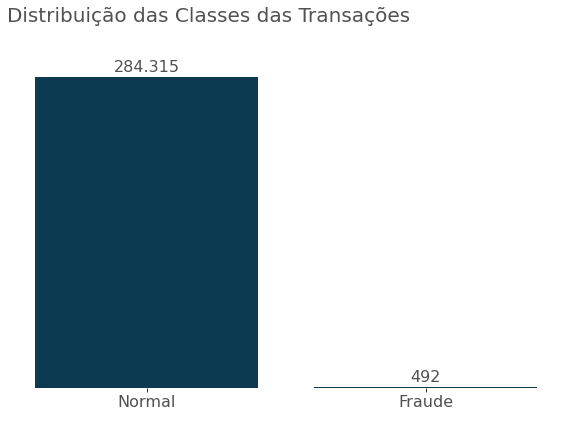

In [ ]:
# plotar gráfico de barras para as Classes
fig, ax = plt.subplots(figsize=(10, 6), dpi = 72)

sns.countplot(df['Class'], color = '#003F5c')

ax.set_frame_on(False)
ax.set_title('Distribuição das Classes das Transações', loc='left', pad=40, fontdict={'fontsize':20}, color='#515151');

ax.get_yaxis().set_visible(False)
ax.set_xticklabels(['Normal', 'Fraude'], fontsize=16, color='#515151')
ax.set_xlabel(' ')

for retangulo in ax.patches:
  ax.text(retangulo.get_x() + retangulo.get_width() / 2,
          retangulo.get_height() + 5000,
          '{:,}'.format(int(retangulo.get_height())).replace(',','.'),
          ha = 'center',
          fontsize=16, color='#515151')


O gráfico de barras acima, mostra que há uma enorme discrepância entre as transações, nem é possível observarmos a barra das transações fraudulentas. Na prática, isso interfere no desempenho do modelo, e será necessário fazer um balanceamento dos dados antes de alimentar o modelo final de classificação.

#### Verificando a quantidade de valores zerados

In [ ]:
# Valores zerados
operacoes = pd.DataFrame(df['Class'].value_counts())
operacoes['%'] = round(  operacoes['Class'] / df.shape[0] *100  ,2)
operacoes = operacoes.rename(columns={"Class" : "QTD_MOVIMENTOS"})
operacoes

,QTD_MOVIMENTOS,%
0,284315,99.83
1,492,0.17


Como temos apenas as variáveis Amount e Time que não passaram pelo processo de PCA, vamos analisar as fraudes por cada uma delas a seguir.

#### **Analisando as fraudes por período de tempo**

In [ ]:
# Tempo das transações
print(f'Time MAX:\t\t{df.Time.max()} segundos')
print(f'Segundos MAX dia:\t {60*60*24} segundos')
print(f'O passo de tempo é: \t {(60*60*24)/(df.Time.max()):.1f} segundos')

Time MAX:		172792.0 segundos
Segundos MAX dia:	 86400 segundos
O passo de tempo é: 	 0.5 segundos


Conseguimos visualizar que a variável Time representa o tempo no passo de 0.5 segundos.

Isso posto, para podermos analisar os dados no histograma de forma mais eficaz, criando uma cópia isolada do dataset, para observar qual momento do dia há mais fraudes.

In [ ]:
df2 = df.copy()

#### Função que retornará frações de meia hora

In [ ]:
def hora(h):
    s = 1 # caso procise analisar a cada meia hora, colocar 0.5
    x = math.floor(  h /60 /60 /2  /s)*s
    return x

In [ ]:
df2['Time'] = df2.apply(lambda x:  hora(x.Time) ,axis=1 )
df2

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,23,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,23,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,23,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,23,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


####**Histograma comparando as transações ao longo do tempo**

Plotamos também dois gráficos a fim de comparar as distribuições das 2 classes ao longo da dimensão tempo (`Time`). Notamos 2 quedas nas transações normais, que podem ser referente ao período noturno, no entanto, não foi identificada nenhum padrão das informações que difere as classes a partir das distribuições da frequência abaixo.

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


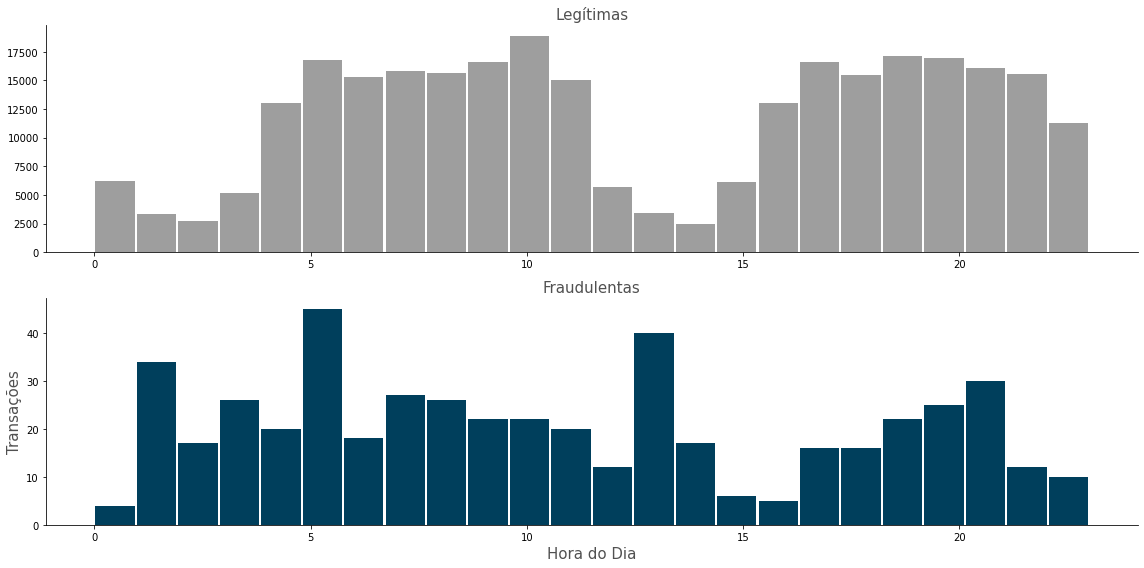

In [ ]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(16,8))

num_bins = 24

ax[0].hist(df2.Time[df2.Class == 0], bins=num_bins, rwidth=0.95, color=cores.get('legitima'))
#ax[0].grid()
ax[0].set_title('Legítimas',color='#515151', fontsize = 15)

ax[0].spines['right'].set_visible(False)
ax[0].spines['top'].set_visible(False)

#plt.subplots_adjust(wspace=0.5, hspace=0.5)

ax[1].hist(df2.Time[df2.Class == 1], bins=num_bins,  rwidth=0.95, color=cores.get('fraude'))
#ax[1].grid()
ax[1].set_title('Fraudulentas', color='#515151', fontsize = 15)

ax[1].spines['right'].set_visible(False)
ax[1].spines['top'].set_visible(False)

plt.xlabel('Hora do Dia', fontsize = 15, color='#515151')
plt.ylabel('Transações', fontsize = 15, color='#515151')

plt.tight_layout()

### **Analisando as fraudes por Amount (Valor)**

In [ ]:
# Fraudes em formato de tabela
pd.DataFrame( df.query('Class == 1')['Amount'].describe() ).rename(columns={'Amount':'Fraudes'})

,Fraudes
count,492.000000
mean,122.211321
std,256.683288
min,0.000000
25%,1.000000
50%,9.250000
75%,105.890000
max,2125.870000


###**Resumo da análise exploratória**



*   O dataset possui 284807 entradas e 31 variáveis.
*   Não há nenhum valor ausente nos dados.
*   Verificamos que apenas 0,64% do conjunto de dados possuem entradas com valor zerado, e por não saber o porquê deles existirem, optamos por deixa-los no dataset.
*   As informações estatísticas para as transações fraudulentas mostram que a sua média está em 122,21 e o valor máximo em 2125,87.
*   As transações normais, a média é 88,29 e o máximo 25.691,16.
*   As variáveis V3, V4, V9-V12, V17 e V18 são bem distintas em relação as transações autênticas e fraudulentas.
*   O conjunto de dados possui **492 fraudes** em **284.315,00 mil transações normais**.
*   É um conjunto de dados extremamente desbalanceado, onde **as fraudes representam apenas 0,17% do total**.
*   Como somente 0,17% dos dados são fraudes será necessário fazer um balanceamento dos dados antes de alimentar o modelo final de classificação.

## **Construindo o modelo de Machine Learning**

## **Preparação dos Dados**

* Normalizar os dados que ainda não haviam sido pré-processados (`Time` e `Amount`)
* Dividir o conjunto de dados entre treino e validação
* Balancear o conjunto de dados

### **Criando um conjunto de teste**
O Modelo de Machine Learning que será usado neste caso é a REGRESSÃO LOGÍSTICA, pois queremos classificar os dados, de acordo com variáveis quantitativas.

Para isso precisamos preparar nossos dados, efetuando algumas limpezas e adequações, para ai sim, dividir os dados entre treino e teste.

Para agrupar os dados de treino e teste, vamos dividir os dados, sendo 70% para treino e 30% para teste.

In [ ]:
# criar o conjunto de teste
test = df.sample(frac=0.30, random_state=0)

# limpar de DF as linhas do dataset `test` criado acima
df = df.drop(test.index)

# verificar o conjunto de treino e etste
print(f"Dimensões do Conjunto de Teste:\t\t {test.shape}")
print(f"Dimensões do Conjunto de Treino:\t {df.shape}")

Dimensões do Conjunto de Teste:		 (85442, 31)
Dimensões do Conjunto de Treino:	 (199365, 31)


### **Padronizar Time e Amount**

Uma vez que representam dois tipos muito diferentes de medição, essas variáveis estão em escalas diferentes. Como as variáveis têm outliers, aplicaremos a técnica de padronização (ou transformação de pontuação Z) antes de dividir o conjunto de dados.

In [ ]:
# Fazer uma cópia dos dados para outra instância em memória
# Qualquer alteração em uma, não alterará em outra.
df_tratado = df.copy() 

In [ ]:
# Algoritmo que padroniza os valores para uma grade de valores pre estabelecidos.
std_scaler = StandardScaler()

# Novas Features Tratadas
df_tratado['std_amount'] = std_scaler.fit_transform(df_tratado['Amount'].values.reshape(-1, 1))
df_tratado['std_time'] = std_scaler.fit_transform(df_tratado['Time'].values.reshape(-1, 1))

# Deletar Features que foram tratadas
df_tratado.drop(['Time', 'Amount'], axis=1, inplace=True)

# visualizar as primeiras entradas
df_tratado.head(10)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class,std_amount,std_time
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.349354,-1.995795
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.141537,-1.995774
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.075892,-1.995753
6,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,-0.099254,-1.416907,-0.153826,-0.751063,0.167372,0.050144,-0.443587,0.002821,-0.611987,-0.045575,-0.219633,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,0,-0.340008,-1.995710
7,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,1.249376,-0.619468,0.291474,1.757964,-1.323865,0.686133,-0.076127,-1.222127,-0.358222,0.324505,-0.156742,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,0,-0.194500,-1.995647
8,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,-0.410430,-0.705117,-0.110452,-0.286254,0.074355,-0.328783,-0.210077,-0.499768,0.118765,0.570328,0.052736,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,0,0.018418,-1.995647
9,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,-0.366846,1.017614,0.836390,1.006844,-0.443523,0.150219,0.739453,-0.540980,0.476677,0.451773,0.203711,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,0,-0.345331,-1.995605
10,1.449044,-1.176339,0.913860,-1.375667,-1.971383,-0.629152,-1.423236,0.048456,-1.720408,1.626659,1.199644,-0.671440,-0.513947,-0.095045,0.230930,0.031967,0.253415,0.854344,-0.221365,-0.387226,-0.009302,0.313894,0.027740,0.500512,0.251367,-0.129478,0.042850,0.016253,0,-0.328590,-1.995584
11,0.384978,0.616109,-0.874300,-0.094019,2.924584,3.317027,0.470455,0.538247,-0.558895,0.309755,-0.259116,-0.326143,-0.090047,0.362832,0.928904,-0.129487,-0.809979,0.359985,0.707664,0.125992,0.049924,0.238422,0.009130,0.996710,-0.767315,-0.492208,0.042472,-0.054337,0,-0.319691,-1.995584
12,1.249999,-1.221637,0.383930,-1.234899,-1.485419,-0.753230,-0.689405,-0.227487,-2.094011,1.323729,0.227666,-0.242682,1.205417,-0.317631,0.725675,-0.815612,0.873936,-0.847789,-0.683193,-0.102756,-0.231809,-0.483285,0.084668,0.392831,0.161135,-0.354990,0.026416,0.042422,0,0.133410,-1.995584


#### **StandardScaler** 
Transforma os dados de maneira que tenha média como 0 e desvio padrão como 1. Em resumo, padroniza os dados.

A padronização é útil para dados que possuem valores negativos. Ele organiza os dados em uma distribuição normal padrão.

### **Dividir os dados entre treino e teste**

A quantidade de movimentos fraudulentos é  menor que os genuínos, logo, analsando somente forma simples, provavelmente, poderiamos perder varias amostras de dados de fraudes, e nosso modelo seria mal treinado, gerando um prejuízo para a empresa.


### Dividindo os dados Desbalanceados

Utilizando x para os dados que conhecemos e y para os que queremos descobrir.

In [ ]:
# Retirar o y do dataset
X = df_tratado.drop('Class', axis=1)

# Pegar somente o y
y = df_tratado['Class']

# dividir entre treino e teste
X_train, X_val, y_train, y_val = train_test_split(X, 
                                                  y, 
                                                  stratify=y,      
                                                  shuffle=True,    # embaralhar os dados antes de "dividir"
                                                  test_size = 0.25 # tamanho do dataset de teste
                                                 )

stratify faz uma divisão de forma que a proporção dos valores na amostra produzida seja a mesma que a proporção dos valores fornecidos ao parâmetro stratify.

Por exemplo, se a variável y é uma variável categórica binário com valores 0 e 1, e há 25% de zeros e 75% dos queridos, stratify=y vai se certificar de que a sua divisão aleatória tem 25% de 0's e 75% de 1' s.

In [ ]:
print(f'O conjunto de treino possui:\t {len(X_train)} linhas')
print(f'O conjunto de teste possui:\t {len(X_val)} linhas')

O conjunto de treino possui:	 149523 linhas
O conjunto de teste possui:	 49842 linhas


Para visualizar o parametro stratify=y em ação, veja que com ele ativo, a proporção de ´0´s e ´1´s foi mantida.

In [ ]:
round( y_train.sum() / len(X_train) * 100 ,2)

0.17

In [ ]:
round( y_val.sum() / len(X_val) * 100 ,2)

0.17

### Dividindo os dados Balanceados

Vamos usar uma biblioteca própria para trabalhar com dados desbalanceados, e o nome dela é imblearn.

Com ela, conseguiremos criar nosso conjunto de treino, com a mesma quantidade de Fraude e Legitimos

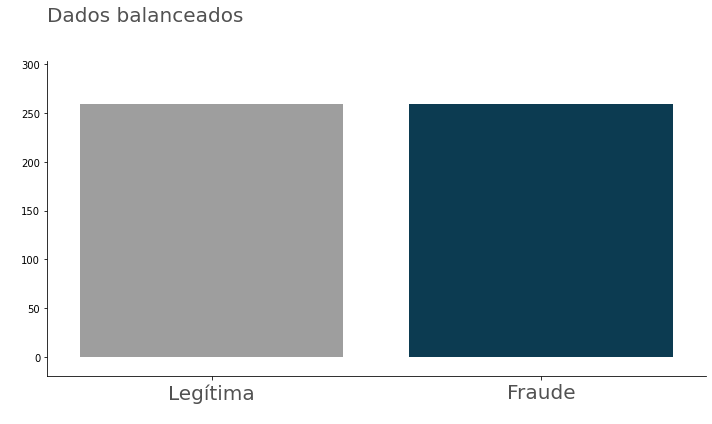

In [ ]:
# plotar gráfico de barras para as Classes
fig, ax = plt.subplots(figsize=(10, 6), dpi = 72)

# Defining random under sampler
bal = RandomUnderSampler()

# Creating new train sets
X_train_bal, y_train_bal = bal.fit_resample(X_train, y_train)

# plotar a nova distribuição de classes
sns.countplot(y_train_bal,)

# Configurações dos gráficos
# ax.set_frame_on(False)
ax.set_title('Dados balanceados', loc='left', pad=40, fontdict={'fontsize':20}, color='#515151');

# Limite do eixo y
plt.ylim((-20, 303))

# ax.get_yaxis().set_visible(False)
ax.set_xticklabels(['Normal', 'Fraude'], fontsize=16, color='#515151')
ax.set_xlabel(' ')
ax.set_ylabel(' ')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)


# Colocando as legendas
plt.xticks([0, 1], ['Legítima', 'Fraude'], fontsize = 20)

# mostrar grafico e subplots
plt.tight_layout();

In [ ]:
# vesualizar o balanceamento das classes
print(pd.Series(y_train_bal).value_counts())

0    259
1    259
Name: Class, dtype: int64




```
# Isto está formatado como código
```

Comparando através de matriz de correlação, as variáveis de treino com e sem a técnica de balanceamento (under-sampling)

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


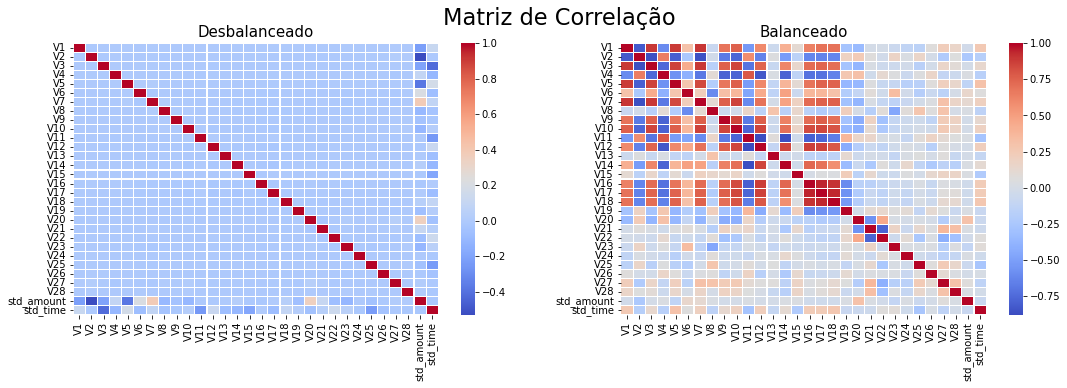

In [ ]:
corr = X_train.corr()
corr_bal = pd.DataFrame(X_train_bal).corr()

fig, ax  = plt.subplots(nrows=1, 
                        ncols=2, 
                        figsize = (18,5)
                       )

tamanho_fonte_titulos = 15

fig.suptitle('Matriz de Correlação', fontsize = tamanho_fonte_titulos * 1.5)

# grafico Desbalanceado
sns.heatmap(corr, 
            xticklabels=corr.columns, 
            yticklabels=corr.columns,
            linewidths=.1, 
            cmap="coolwarm", 
            ax=ax[0]
           )

ax[0].set_title('Desbalanceado', fontsize = tamanho_fonte_titulos)

# grafico Balanceado
sns.heatmap(corr_bal, 
            xticklabels=corr_bal.columns, 
            yticklabels=corr_bal.columns,
            linewidths=.1, 
            cmap="coolwarm", 
            ax=ax[1]
           )

ax[1].set_title('Balanceado', fontsize = tamanho_fonte_titulos)

plt.show()


Olhando a matriz de correlação entre as variáveis dos dados desbalanceados, verá que parece algo binário, ou seja, é azul ou vermelho, algo que não é bom para nosso modelo de inteligência artificial.

Olhando para o gráfico com os dados balanceados, podemos visualizar que vários tons de vermelho e azul aparecem, evidenciando o grau de calor de relação entre as variáveis.

Ou seja, com os dados balanceados, nosso modelo de Machine Learning terá menos chance de erro, pois ele consegue entender melhor relação entre as variáveis.

## Modelo de Machine Learning

* Construir um modelo para **classificação**.
* Construir mais de um modelo para avaliar os desempenhos

Treinando o modelo de Machine Learning (Inteligencia Artificial).

Para isso vamos utilizar as ferramentas da biblioteca sklearn, com os dados de treino BALANCEADOS.

In [ ]:
# Definindo um seed (semente) para que toda vez que o modelo for executado, ele chegue ao mesmo resultado
seed = np.random.seed(2)

# Escolhendo o modelo de Inteligência Artificial (IA) e passando hiperparâmetros
model = LogisticRegression(random_state = seed)

# Treinando o modelo de IA -> USANDO DADOS BALANCEADOS
model.fit(X_train_bal, y_train_bal)

# fazer as previsões em cima dos dados de teste
y_pred  = model.predict(X_val)
y_proba = model.predict_proba(X_val)

In [ ]:
def metricas(val, pred):

    # matrix de confusão
    skplt.metrics.plot_confusion_matrix(val, pred, normalize=True)

    # relatório de classificação
    print("Relatório de Classificação:\n\n", classification_report(val, pred, digits=4))

    # acurácia do modelo
    print("Acurácia: {:.4f}\n".format(accuracy_score(val, pred)))

    # área sob da curva
    print("AUC: {:.4f}\n".format(roc_auc_score(val, pred)))

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


Relatório de Classificação:

               precision    recall  f1-score   support

           0     1.0000    0.9588    0.9790     49756
           1     0.0394    0.9767    0.0757        86

    accuracy                         0.9588     49842
   macro avg     0.5197    0.9678    0.5273     49842
weighted avg     0.9983    0.9588    0.9774     49842

Acurácia: 0.9588

AUC: 0.9678



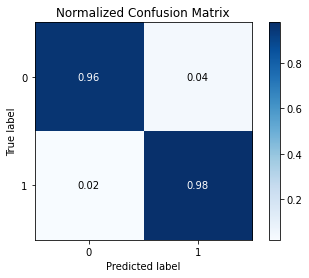

In [ ]:
metricas(y_val, y_pred)

Analisando a avaliação do desempenho, e neste tipo de problema, originalmente desbalanceado, a acurácia não é uma métrica adequada.

 **você pode ter uma acurácia de 99,88% e detectar menos de 60% das fraudes** e isso é terrível para a empresa.

Observe a matriz de confusão para ver a taxa de acertos para transações fraudulentas, ou pela coluna recall do Relatório de Classificação.

Uma outra métrica considerada interessante para se avaliar a eficácia é a AUC ROC, ou área sob a curva. No caso desse modelo de Regressão Logística, no nosso case, tem-se mais de 90% de AUC.

## Avaliar o desempenho do modelo

* Identificar a melhor métrica para esse tipo de modelo
* Comparar o desempenho entre diversos modelos

Vamos então aplicar o mesmo algoritmo acima para sobre os dados de teste, e para isolar o dataset de teste, vamos criar o test em outra instância de memória com o uso do .copy()

Vou "rodar" na mesma célula, pois anteriormente foi só para mostrar como funciona e tecer comenários parte-a-parte.

Relatório de Classificação:

               precision    recall  f1-score   support

           0     0.9998    0.9588    0.9789     85295
           1     0.0367    0.9116    0.0705       147

    accuracy                         0.9587     85442
   macro avg     0.5183    0.9352    0.5247     85442
weighted avg     0.9982    0.9587    0.9773     85442

Acurácia: 0.9587

AUC: 0.9352



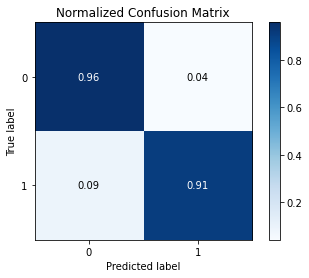

In [ ]:
# padronizar as colunas Time e Amount - Teste
test_clean = test.copy()

# Algoritmo que padroniza os valores para uma grade de valores pre estabelecidos.
std_scaler = StandardScaler()

# Novas Features Tratadas
test_clean['std_amount']  = std_scaler.fit_transform(test_clean['Amount'].values.reshape(-1, 1))
test_clean['std_time']    = std_scaler.fit_transform(test_clean['Time'].values.reshape(-1, 1))

# Deletando Features que foram tratadas
test_clean.drop(['Time', 'Amount'], axis=1, inplace=True)

# separar variáveis entre X e y
X_test = test_clean.drop('Class', axis=1)
y_test = test['Class']

# fazer as previsões em cima dos dados de teste
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)

metricas(y_test, y_pred)

**Resumo das métricas**
Quando analisamos um conjunto de dados desequilibrado, a precisão não é uma boa métrica para avaliar o desempenho do nosso modelo. Isso ocorre porque em alguns casos, mesmo com alta precisão, o número de casos de interesse (neste caso, fraude) que realmente somos capazes de prever pode ser baixo.

Nesses casos, métricas melhores para olhar são a precisão, o recall e a métrica AUC ROC.

Para ser mais específico, a precisão do nosso modelo mede a capacidade do modelo de evitar rotular um caso positivo que é realmente negativo. O que isso significa no nosso caso é: De todas as transações que foram previstas pelo nosso modelo para serem fraudulentas, quantas foram fraudes reais?

Com o balanceamento dos dados tivemos uma precisão de 95%

O recall, ou sensibilidade, é a capacidade do nosso modelo de identificar corretamente todos os casos positivos. Traduzindo para o nosso caso aqui: De todas as fraudes reais registradas no conjunto de dados, quantas delas foram detectadas pelo nosso modelo?

Com o balanceamento dos dados tivemos um recall de 95%

É fácil perceber qual desses casos é mais importante aqui. Prever casos positivos verdadeiros é essencial para evitar que fraudes aconteçam. Considerando que atribuir fraude a uma transação regular só causaria um pequeno desconforto, e poderia ser facilmente tratado pelo proprietário do cartão e pela empresa detentora de cartões.

Quanto ao AUC, é o cálculo da área sob uma curva ROC (que é uma curva de probabilidade). Uma curva ROC traça a sensibilidade (taxa de verdadeiros positivos) contra 1 — Especificidade (taxa de falsos positivos). Quanto maior a área sob a curva (ou seja, quanto mais perto de 1 o valor é), melhor será o nosso modelo em distinguir as classes (fraude de transações normais).

Com o balanceamento dos dados tivemos um AUC de 93%

## Considerações finais

Foi realizada uma análise básica utilizando o modelo de classificação de aprendizado de máquina: A Regressão Logística.

Quanto aos dados, foi visto que há dois picos aparentes no tempo em que as fraudes ocorrem às 5h e às 13h. 

Em relação ao modelo de classificação, na fase de validação, foi descoberto que a Regressão Logística obteve bons resultados, especialmente por atingir mais de 90% de precisão com um conjunto de dados equilibrado, logo pode ser considerado um bom modelo para distinguir corretamente entre transações fraudulentas e normais.

Apesar desses bons resultados, uma melhora adicional pode e deve ser feita nesse modelo. No futuro, é importante verificar e ajustar esses modelos alterando seus hiperparmetros adequadamente, visando manter as taxas de recall altas e, ao mesmo tempo, aumentar as taxas de precisão sempre que possível.